In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('training_norm.csv')
df = df[df['speed'] <= 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13792 entries, 0 to 13792
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  13792 non-null  int64  
 1   angle     13792 non-null  float64
 2   speed     13792 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 431.0 KB


In [5]:
df['speed'].value_counts().sort_index() / df['speed'].count()

speed
0.0    0.245795
1.0    0.754205
Name: count, dtype: float64

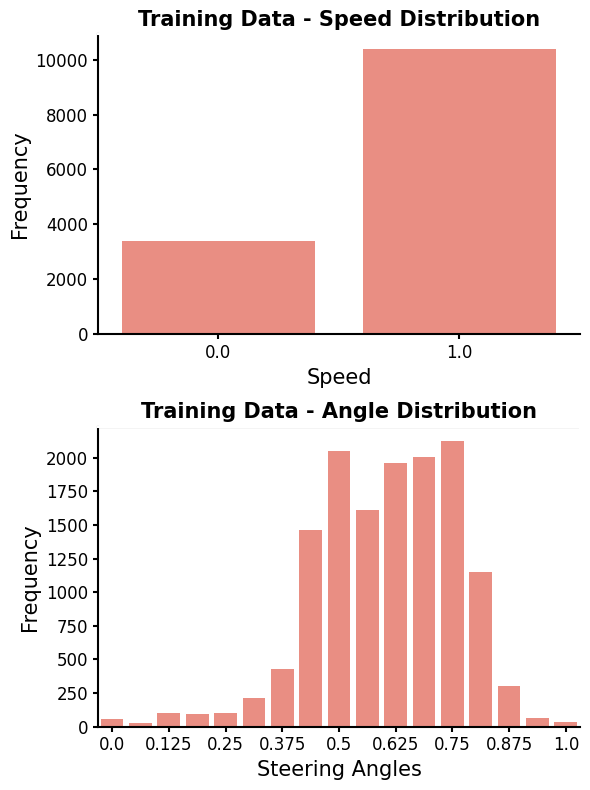

In [3]:

# Create a figure and axes
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

size = df['speed'].count()

# Plot Speed bar plot
speed_counts = df['speed'].value_counts().sort_index()
sns.barplot(x=speed_counts.index, y=speed_counts.values, ax=axes[0], color='salmon')
axes[0].set_title('Training Data - Speed Distribution', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Speed', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)

# Plot Steering Angles histogram
angles_counts = df['angle'].value_counts().sort_index()
sns.barplot(x=angles_counts.index, y=angles_counts.values, ax=axes[1], color='salmon')
axes[1].set_title('Training Data - Angle Distribution', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Steering Angles', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)

tick_labels = angles_counts.index.to_list()
axes[1].set_xticks(range(0, len(tick_labels), 2))
axes[1].set_xticklabels([tick_labels[i] for i in range(0, len(tick_labels), 2)])


# Bold and thicken axes lines and ticks
for ax in axes:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', which='major', labelsize=10, width=1.5)
    ax.tick_params(axis='y', which='major', labelsize=10, width=1.5)

       # Make the numbers on the axes bold
    for label in ax.get_xticklabels():
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)

# Draw a horizontal line between the plots
axes[1].axhline(axes[1].get_ylim()[1], color='black', linewidth=1.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('class_imbalance.png')

#### Now what happens if you flip all angles horizontally

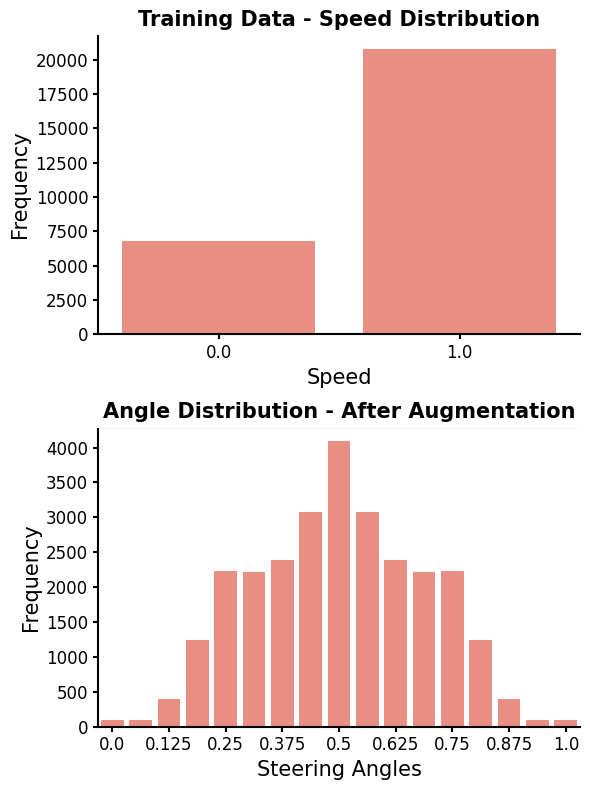

In [6]:
# Duplicate the DataFrame
df_duplicate = df.copy()

# Modify the 'angle' column in the duplicate DataFrame
df_duplicate['angle'] = 1 - df_duplicate['angle']

# Concatenate the original and modified DataFrames
df = pd.concat([df, df_duplicate], ignore_index=True)


# Create a figure and axes
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

size = df['speed'].count()

# Plot Speed bar plot
speed_counts = df['speed'].value_counts().sort_index()
sns.barplot(x=speed_counts.index, y=speed_counts.values, ax=axes[0], color='salmon')
axes[0].set_title('Training Data - Speed Distribution', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Speed', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)

# Plot Steering Angles histogram
angles_counts = df['angle'].value_counts().sort_index()
sns.barplot(x=angles_counts.index, y=angles_counts.values, ax=axes[1], color='salmon')
axes[1].set_title('Angle Distribution - After Augmentation', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Steering Angles', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)

tick_labels = angles_counts.index.to_list()
axes[1].set_xticks(range(0, len(tick_labels), 2))
axes[1].set_xticklabels([tick_labels[i] for i in range(0, len(tick_labels), 2)])


# Bold and thicken axes lines and ticks
for ax in axes:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='x', which='major', labelsize=10, width=1.5)
    ax.tick_params(axis='y', which='major', labelsize=10, width=1.5)

       # Make the numbers on the axes bold
    for label in ax.get_xticklabels():
        label.set_fontsize(12)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)

# Draw a horizontal line between the plots
axes[1].axhline(axes[1].get_ylim()[1], color='black', linewidth=1.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('flip_helps_angle_balance.png')